In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key, geoapify_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the NumPy module.
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
city_data_to_load = "weather_data/cities.csv"
city_data = pd.read_csv(city_data_to_load)

In [3]:
len(city_data)

584

In [4]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tuktoyaktuk,CA,2023-01-23 20:07:12,69.4541,-133.0374,-12.19,95,100,6.91
1,1,Viedma,AR,2023-01-23 20:03:37,-40.8135,-62.9967,90.23,24,0,17.52
2,2,Caravelas,BR,2023-01-23 20:07:24,-17.7125,-39.2481,81.81,78,100,10.78
3,3,Jamestown,US,2023-01-23 20:07:28,42.0970,-79.2353,31.59,72,100,10.36
4,4,Dera Bugti,PK,2023-01-23 20:07:33,29.0307,69.1510,47.73,28,0,4.00
5,5,Qaanaaq,GL,2023-01-23 20:07:35,77.4840,-69.3632,-18.44,59,27,7.09
6,6,Hilo,US,2023-01-23 20:04:57,19.7297,-155.0900,81.28,82,75,7.00
7,7,Bredasdorp,ZA,2023-01-23 20:07:53,-34.5322,20.0403,66.09,68,13,10.60
8,8,Nikolskoye,RU,2023-01-23 20:07:54,59.7035,30.7861,21.09,96,82,4.83
9,9,Katherine,AU,2023-01-23 20:07:54,-14.4667,132.2667,77.32,83,100,5.75


In [5]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-01-23 20:07:12,69.4541,-133.0374,-12.19,95,100,6.91
1,Viedma,AR,2023-01-23 20:03:37,-40.8135,-62.9967,90.23,24,0,17.52
2,Caravelas,BR,2023-01-23 20:07:24,-17.7125,-39.2481,81.81,78,100,10.78
3,Jamestown,US,2023-01-23 20:07:28,42.0970,-79.2353,31.59,72,100,10.36
4,Dera Bugti,PK,2023-01-23 20:07:33,29.0307,69.1510,47.73,28,0,4.00
5,Qaanaaq,GL,2023-01-23 20:07:35,77.4840,-69.3632,-18.44,59,27,7.09
6,Hilo,US,2023-01-23 20:04:57,19.7297,-155.0900,81.28,82,75,7.00
7,Bredasdorp,ZA,2023-01-23 20:07:53,-34.5322,20.0403,66.09,68,13,10.60
8,Nikolskoye,RU,2023-01-23 20:07:54,59.7035,30.7861,21.09,96,82,4.83
9,Katherine,AU,2023-01-23 20:07:54,-14.4667,132.2667,77.32,83,100,5.75


In [6]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [8]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'01/24/23'

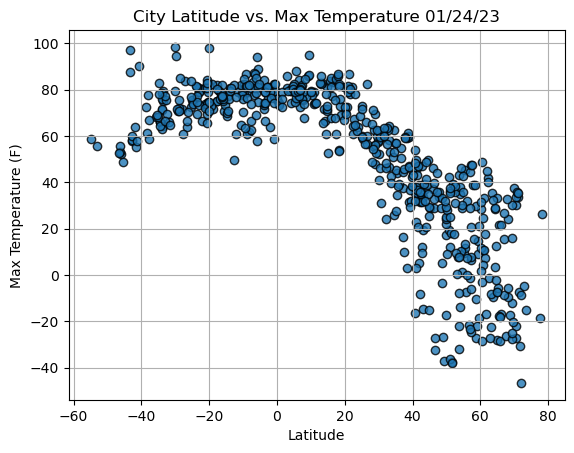

In [9]:
# Import time module
import time

# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

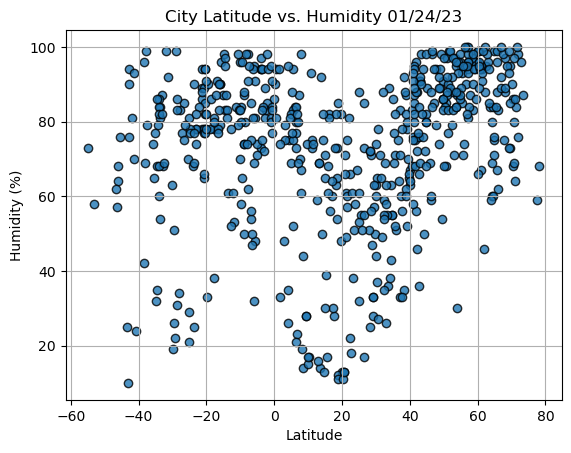

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

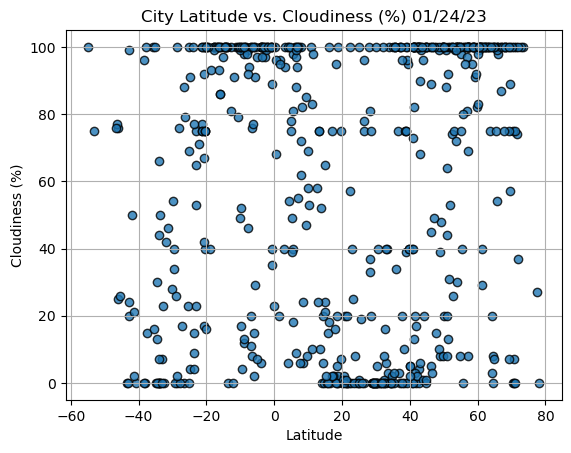

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

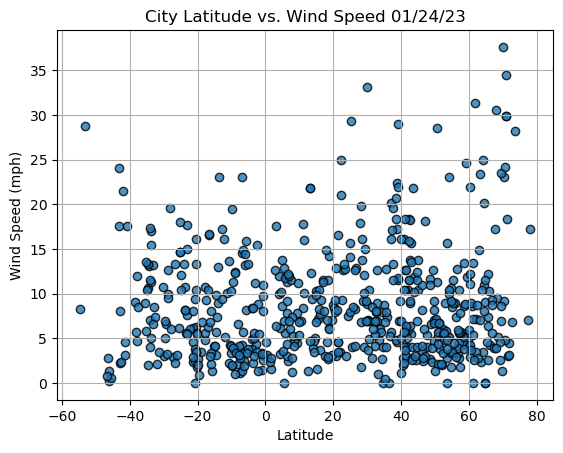

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

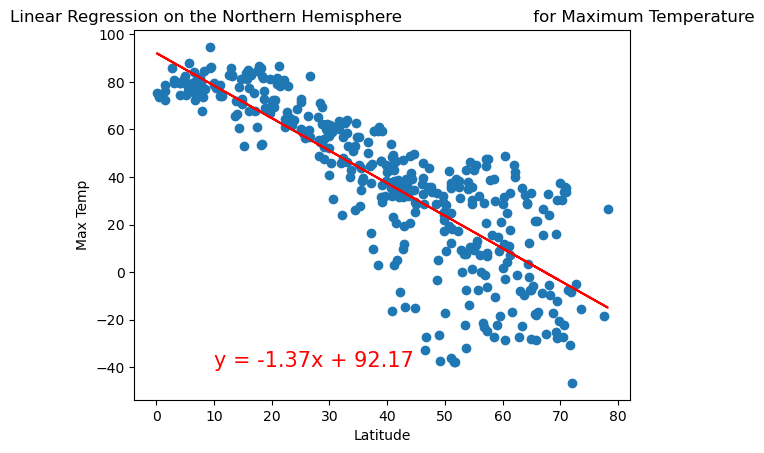

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

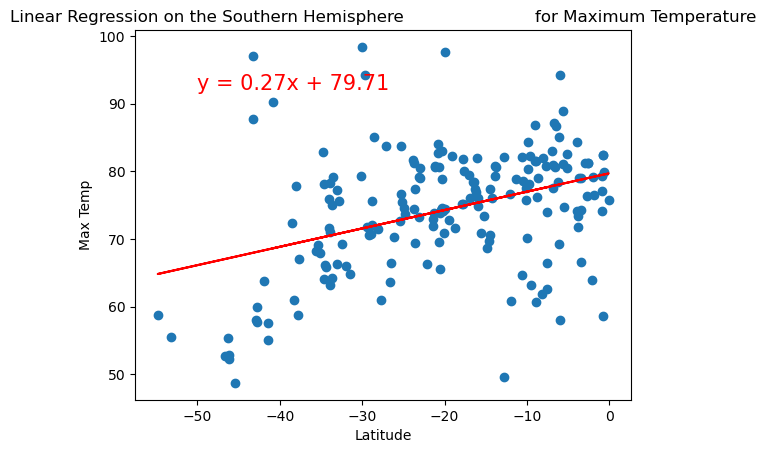

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,92))

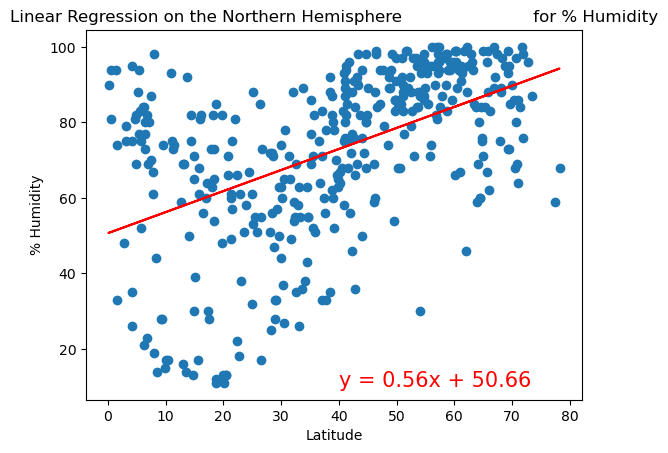

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

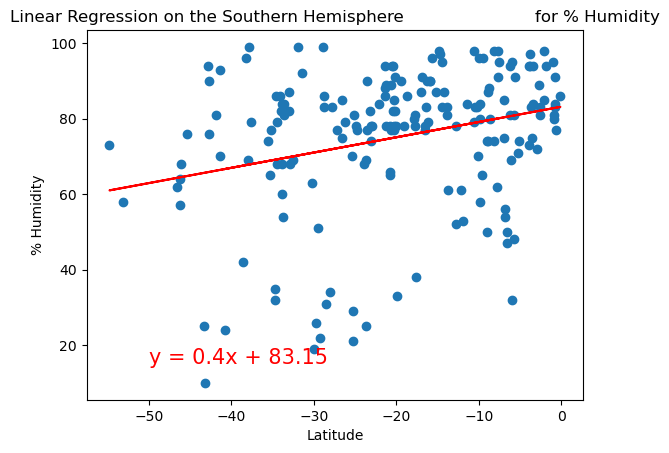

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

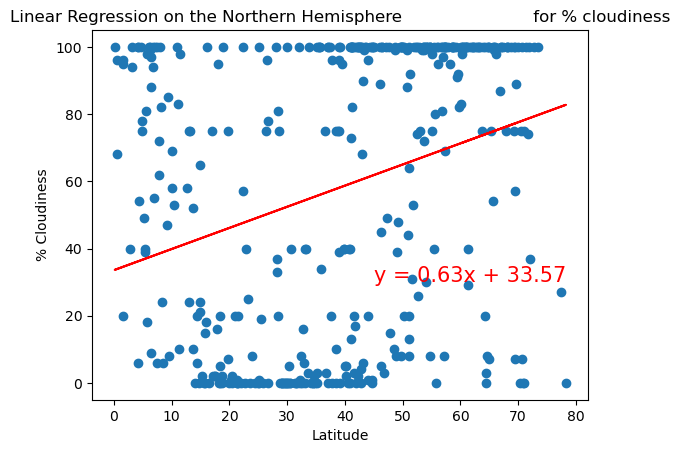

In [19]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% Cloudiness',(45,30))

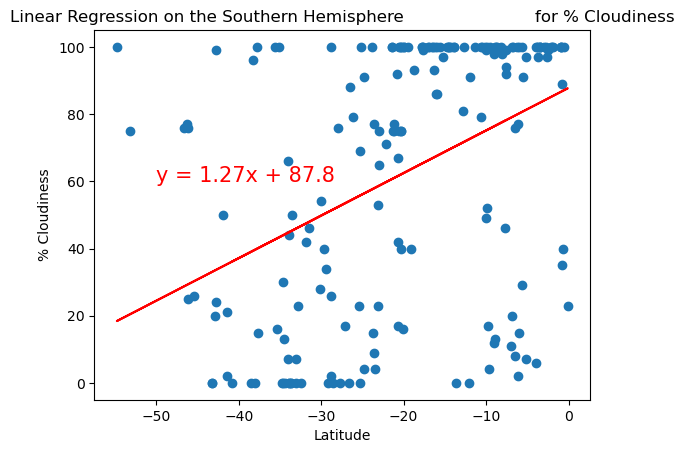

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

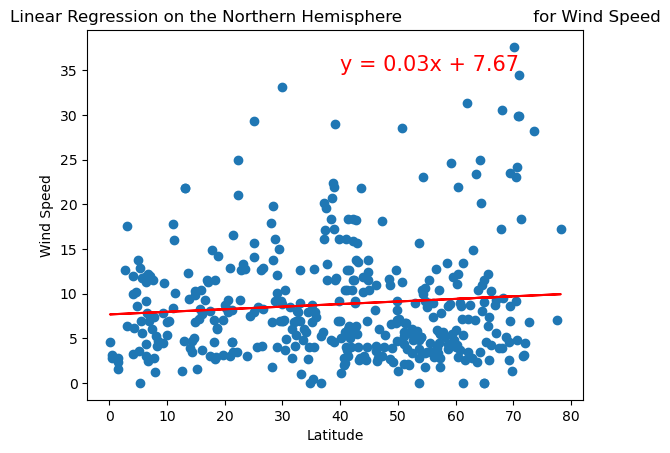

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

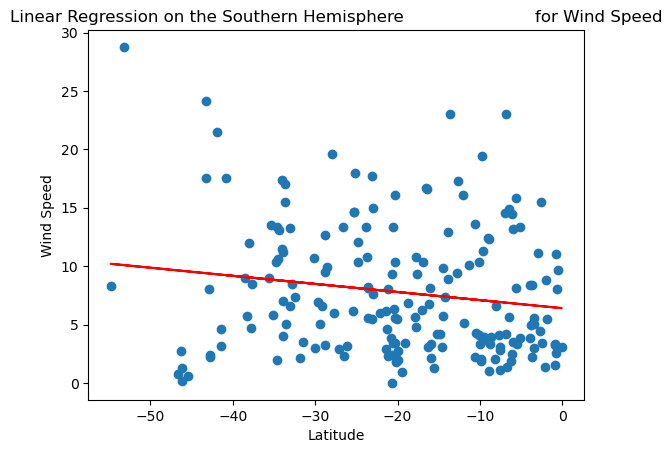

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [23]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [24]:
preferred_cities_df = city_data_df.loc[
    (city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)
]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Caravelas,BR,2023-01-23 20:07:24,-17.7125,-39.2481,81.81,78,100,10.78
6,Hilo,US,2023-01-23 20:04:57,19.7297,-155.0900,81.28,82,75,7.00
9,Katherine,AU,2023-01-23 20:07:54,-14.4667,132.2667,77.32,83,100,5.75
10,Bontang,ID,2023-01-23 20:07:55,0.1333,117.5000,75.43,90,100,4.56
14,Conchas,BR,2023-01-23 20:07:57,-23.0153,-48.0106,79.00,74,65,7.65
15,Port Alfred,ZA,2023-01-23 20:07:57,-33.5906,26.8910,79.18,84,50,5.01
20,Hambantota,LK,2023-01-23 20:07:59,6.1241,81.1185,76.66,84,100,11.88
23,Avarua,CK,2023-01-23 20:08:00,-21.2078,-159.7750,80.65,78,77,8.05
28,Arraial Do Cabo,BR,2023-01-23 20:08:01,-22.9661,-42.0278,80.46,78,75,14.97
29,Kavieng,PG,2023-01-23 20:08:04,-2.5744,150.7967,81.18,81,97,15.46


In [25]:
preferred_cities_df.count()

City          160
Country       160
Date          160
Lat           160
Lng           160
Max Temp      160
Humidity      160
Cloudiness    160
Wind Speed    160
dtype: int64

In [26]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Caravelas,BR,81.81,-17.7125,-39.2481,
6,Hilo,US,81.28,19.7297,-155.0900,
9,Katherine,AU,77.32,-14.4667,132.2667,
10,Bontang,ID,75.43,0.1333,117.5000,
14,Conchas,BR,79.00,-23.0153,-48.0106,
15,Port Alfred,ZA,79.18,-33.5906,26.8910,
20,Hambantota,LK,76.66,6.1241,81.1185,
23,Avarua,CK,80.65,-21.2078,-159.7750,
28,Arraial Do Cabo,BR,80.46,-22.9661,-42.0278,
29,Kavieng,PG,81.18,-2.5744,150.7967,


In [27]:
# Set initial parameters to search for a hotel.
radius = 5000
params = {
    "categories":"accommodation.hotel",
    "apiKey": geoapify_key,
}

In [32]:
# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from DataFrame.
    latitude = row["Lat"]
    longitude = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"

    # Set up the base URL for the Geoapify Places API.
    base_url = "https://api.geoapify.com/v2/places"

    # Make request and retrieve the JSON data by using the params dictionary
    name_address = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = name_address.json()

       # Get the first hotel from the results and store the name
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Caravelas,BR,81.81,-17.7125,-39.2481,Pousada dos Navegantes
6,Hilo,US,81.28,19.7297,-155.0900,Dolphin Bay Hotel
9,Katherine,AU,77.32,-14.4667,132.2667,Knott's Crossing Resort
10,Bontang,ID,75.43,0.1333,117.5000,Hotel Bintang Sintuk
14,Conchas,BR,79.00,-23.0153,-48.0106,No hotel found
15,Port Alfred,ZA,79.18,-33.5906,26.8910,Ferryman
20,Hambantota,LK,76.66,6.1241,81.1185,Peacock Beach hotel Hamabthota
23,Avarua,CK,80.65,-21.2078,-159.7750,Natura Nikao Beach Bungalow
28,Arraial Do Cabo,BR,80.46,-22.9661,-42.0278,Pousada Vida Boa Praia
29,Kavieng,PG,81.18,-2.5744,150.7967,Kavieng Niu Lodge


In [36]:
# Import the required libraries
import hvplot.pandas
import pandas as pd
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")
# Configure the map
hotel_map = hotel_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Max Temp",
    scale = 1,
    color = "City",
    hover_cols = ["Hotel Name", "Country"]
)

# Display the map plot
hotel_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Max Temp,Hotel Name,Country)